In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
import pandas as pd
import numpy as np
import sklearn as sk

df = pd.read_csv("/content/drive/MyDrive/datasets/titanic.csv")

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df.shape

(891, 12)

In [7]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [54]:
df.groupby('Survived')['PassengerId'].count()

,PassengerId
Survived,
0,549
1,342


In [55]:
## PRE-PROCESSING

# 1. drop columns that arent required for predicting survival test case (unique values like id, name, ticket are not required for survival)

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
df = df[['Survived', 'Pclass','Sex', 'Age', 'SibSp','Parch','Fare', 'Cabin', 'Embarked']]

In [56]:
 # 2. CHECKING FOR NULL VALUES

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
# note:more than 80% of cabin data as null. so drop the column

df = df.drop('Cabin',axis=1)

In [12]:
# since age column has 177 null values,  see percentage of null to perform impute or drop function

177/891

0.19865319865319866

<Axes: xlabel='Age', ylabel='Density'>

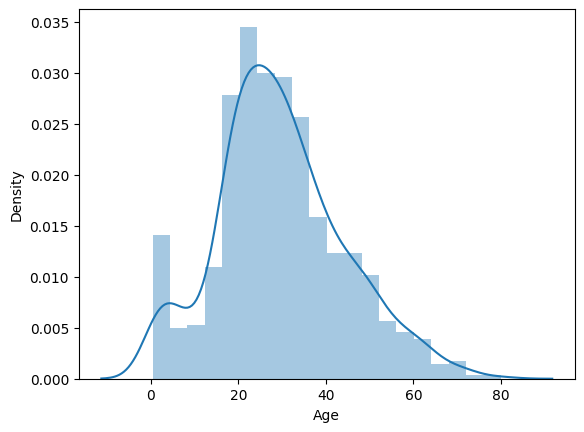

In [13]:
# 19% null values in age column (> than 10%, can't drop the col ).Impute with mean, median.

sns.distplot(df['Age'])

# since the age column slightly skewed but almost normal dist, using mean to impute


In [14]:
df['Age'].mean()

np.float64(29.69911764705882)

In [15]:
df['Age'].fillna(np.round(df['Age'].mean(),0), inplace = True)

In [16]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [17]:
#  2 null values in embarked column. since it is categorical value, use mode to impute

df['Embarked'].mode()

,Embarked
0,S


In [18]:
df['Embarked'].fillna(df['Embarked'].mode(), inplace = True)

In [ ]:
# 2. changing categorical values using labels since ML models can't handle alpha values
              # for sex { female, male}--->  using LabelEncoder
              # for embarked { S,C,Q}---> using one hot encoder

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [21]:
# one hot encoder
embark = pd.get_dummies(df['Embarked']).astype(int)

In [22]:
embark.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [23]:
#  add this embark dataframe to our df

df = pd.concat([df,embark], axis = 1)


In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,1,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,0,1


In [25]:
# Now drop embarked column since dummies cols are replacing it
df = df.drop('Embarked', axis = 1)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [27]:
## Standardisation : to bring all values to similar scale
# 1. seperate feature (x) and label(y : survival)

x = df.iloc[:,1:] # all the rows, select from col 1
y = df['Survived']

In [28]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [29]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [31]:
# 2. Standardising  x values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ft = ss.fit_transform(x) # we get a numpy array

x_df = pd.DataFrame(ft) # change it into dataframe
x_df.head(3)

,0,1,2,3,4,5,6,7,8
0,0.827377,0.737695,-0.597055,0.432793,-0.473674,-0.502445,-0.482043,-0.307562,0.619306
1,-1.566107,-1.355574,0.634162,0.432793,-0.473674,0.786845,2.074505,-0.307562,-1.614710
2,0.827377,-1.355574,-0.289251,-0.474545,-0.473674,-0.488854,-0.482043,-0.307562,0.619306


In [32]:
## 3. Modeling :
# 1. divide the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_df,y, test_size = 0.20, random_state = 40)


In [33]:
x.shape, x_train.shape, x_test.shape

((891, 9), (712, 9), (179, 9))

In [34]:
y_train.shape, y_test.shape

((712,), (179,))

In [74]:
## 4. Model importing---> select a model and input the train data

from sklearn.linear_model import LogisticRegression

m1 = LogisticRegression( class_weight='balanced')
m1.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [75]:
# Model Evaluation --> use the xtest data to predict
pred = m1.predict(x_test)
pred


array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1])

In [76]:
# predict it's accuracy
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,pred)

0.8268156424581006

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       103
           1       0.78      0.83      0.80        76

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.83      0.83      0.83       179



In [92]:
# Model 2: using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
m2 = DecisionTreeClassifier()
m2.fit(x_train,y_train)

DecisionTreeClassifier()

In [97]:
# predicting model 2
pred2 = m2.predict(x_test)
pred2

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1])

In [96]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,pred2)

0.7988826815642458

In [95]:
print( classification_report(y_test, pred2))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.76      0.76      0.76        76

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [69]:
# model 3: Random forest classifier

from sklearn.ensemble import RandomForestClassifier
m3 =  RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)
m3.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [70]:
# model predicting
pred3 = m3.predict(x_test)
pred3

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1])

In [71]:
# model3 evaluating

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, pred3)


0.8435754189944135

In [72]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       103
           1       0.84      0.78      0.81        76

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



In [98]:

print( 'Model1 :Logistic regression', accuracy_score(y_test,pred))
print( 'Model2 : Decision tree classifier', accuracy_score(y_test,pred2))
print( 'Model3 : Random forest classifier', accuracy_score(y_test,pred3))

Model1 :Logistic regression 0.8268156424581006
Model2 : Decision tree classifier 0.7988826815642458
Model3 : Random forest classifier 0.8435754189944135


In [ ]:
#  Random forest classifier has higher accuracy compared to the other models.